## Project: Data Analysis for Palmer Penguin data
- **Source**: Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. Artwork by @allison_hors
- **URL**: 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
- **Date**: 29/11/24
- **Goal**: Learn the basis of descriptive statistics

In [1]:
# Step 0. Load libraries and custom modules
# Data -----------------------------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1. Data loading
**Objective**: Obtain the data from source and get a first glimpse of their properties and presentation

In [2]:
# Step 1. Load data
# 1.1 Read the dataset from url
# Credits:
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
# Archipelago (Antarctica) penguin data. R package version 0.1.0.
# https://allisonhorst.github.io/palmerpenguins/
url = 'https://gist.githubusercontent.com/slopp/'+ \
      'ce3b90b9168f2f921784de84fa445651/raw/' + \
      '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
df_raw = pd.read_csv(url)

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>

**Image 1.** Penguins drawing. Artwork by @allison_hors.

In [3]:
# 1.2 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [4]:
# 1.3 Get a reproducible sample
df_raw.sample(10,random_state=2025) #random state me ayuda a que la muestra sea replicable y se mantenga igual, 2025 es el numero de semilla

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
172,173,Gentoo,Biscoe,50.2,14.3,218.0,5700.0,male,2007
254,255,Gentoo,Biscoe,47.2,15.5,215.0,4975.0,female,2009
69,70,Adelie,Torgersen,41.8,19.4,198.0,4450.0,male,2008
236,237,Gentoo,Biscoe,44.9,13.8,212.0,4750.0,female,2009
258,259,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,female,2009
60,61,Adelie,Biscoe,35.7,16.9,185.0,3150.0,female,2008
133,134,Adelie,Dream,37.5,18.5,199.0,4475.0,male,2009
264,265,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,female,2009
33,34,Adelie,Dream,40.9,18.9,184.0,3900.0,male,2007
124,125,Adelie,Torgersen,35.2,15.9,186.0,3050.0,female,2009


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

**Image 2.** Penguins dimensions. Artwork by @allison_hors.

### 2. Data preprocessing
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [8]:
# Step 2. Prepara the dataset for analysis
# 2.1 Manage NaN values
# Sabemos que:
# 1. hay datos imcopletos
# 2. hay datos tipo texto que puede ser categoricos
# 3. hay columnas que no necesitamos como rowid

df_baking = df_raw.copy()
df_baking = df_baking.drop(["rowid","year"],axis=1) #La funcion drop eliminamos columnas. Eliminamos la columna year porque no sabemos si se hicieron medidas del mismo pinguino o no
#eliminacion de datos Nan, como regla si son menos del 5% los podemos eliminar 
df_baking = df_baking.dropna(subset=["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g", "sex"]) 
df_baking["island"] = pd.Categorical(df_baking["island"]) #pd.Categorical convierte columnas a tipo categoria
df_baking["sex"] = pd.Categorical(df_baking["sex"])
df_baking["species"] = pd.Categorical(df_baking["species"])
df_baking.info()
df = df_baking.copy()



<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.4 KB


### 3. Exploratory Data Analysis
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [15]:
# 3.1 Get numerical and categorical summaries
#Medidas de tendencia central
#Media
meanMass = df["body_mass_g"].mean()
print(meanMass)

#Mediana
medianMass = df["body_mass_g"].median()
print(medianMass)

#Desviacion Estandard
stdMass = df["body_mass_g"].std()
print(stdMass)

#Rango. Diferencia entre valor mayor y menor
mayor = df["body_mass_g"].max()
menor = df["body_mass_g"].min()
rango = mayor - menor
print(rango)


4207.057057057057
4050.0
805.2158019428964
3600.0


In [23]:
#Calcular todas las medidas de tendencia central
display(df.describe(include="number").T) #T para cambiar filas por columnas
display(df.describe(include="category").T)

#Rango = max - min
#Rango intercuartilico = Q3(75%) - Q1(25%)

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,male,168


In [32]:
# 3.2 Count categorical values, in a stratified manner
# Las categorias pueden estar relacionadas a otras, por eso es util verlos de forma estratificada.
display(df["sex"].value_counts(normalize=True))

display(df[["species","island"]].value_counts())

sex
male      0.504505
female    0.495495
Name: proportion, dtype: float64

species    island   
Gentoo     Biscoe       119
Chinstrap  Dream         68
Adelie     Dream         55
           Torgersen     47
           Biscoe        44
Name: count, dtype: int64

In [37]:
# 3.3 Create a cross table
pd.crosstab(df["species"],[df["species"],df["island"]]).T #El primer valor es la unidad de conteo, el segundo la lista de variables a cruzar

species              Adelie  Chinstrap  Gentoo
species   island                              
Adelie    Biscoe         44          0       0
          Dream          55          0       0
          Torgersen      47          0       0
Chinstrap Dream           0         68       0
Gentoo    Biscoe          0          0     119

In [43]:
# 3.4 Calculate statistics by species
#Estadisticas por un valor y una categoria
df.groupby("species",observed=False)["body_mass_g"].agg(["mean", "median", "std", "max", "min"])

,mean,median,std,max,min
species,,,,,
Adelie,3706.164384,3700.0,458.620135,4775.0,2850.0
Chinstrap,3733.088235,3700.0,384.335081,4800.0,2700.0
Gentoo,5092.436975,5050.0,501.476154,6300.0,3950.0


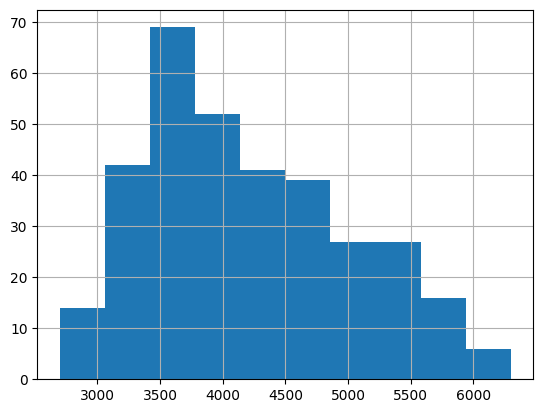

In [ ]:
# 3.5 Show the histograms #Simetrica, sesgo posotivo, sesgo negativo, unimodal, bimodal 
df["body_mass_g"].hist()
plt.show()

/tmp/ipykernel_2393/747015192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.hist(column="body_mass_g",by="species",sharey=True)


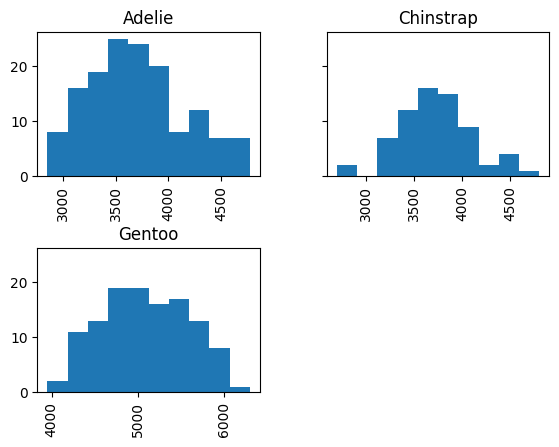

In [48]:
df.hist(column="body_mass_g",by="species",sharey=True) # para compartir la misma escala en Y de 0 a 20
plt.show()

/tmp/ipykernel_2393/3655620117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df["species"]=="Adelie"].hist(column="body_mass_g",by="sex",sharey=True,sharex=True)


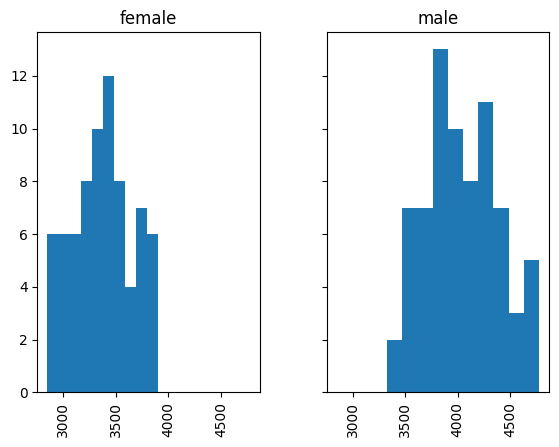

In [54]:
df[df["species"]=="Adelie"].hist(column="body_mass_g",by="sex",sharey=True,sharex=True)
plt.show()

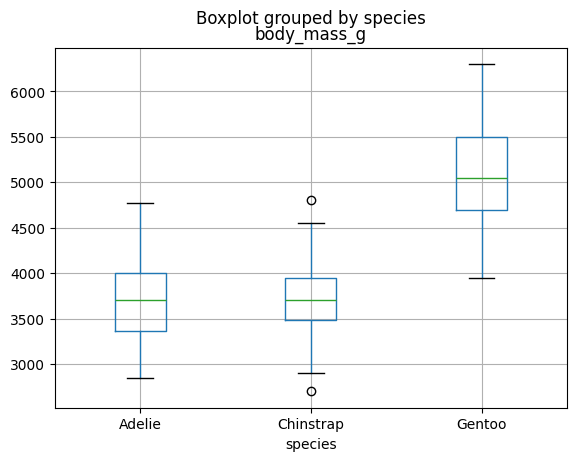

In [55]:
# 3.6 Show the boxplot of the numerical values
df.boxplot(column="body_mass_g",by="species")
plt.show()

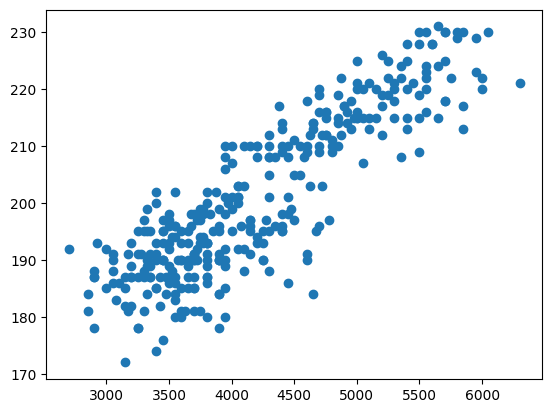

In [60]:
# 3.7 Show the bivariate analysis
#Graficos interactivos, analisis univariado
fig = px.box(df,x="species",y="body_mass_g",color="species")
fig.show()

#Graficos interactivos, analisis bivariado
plt.scatter(df["body_mass_g"],df["flipper_length_mm"])
plt.show()

In [53]:
# 3.8 Calculate probabilities for continuous data
